# Festival data

The following sheet analyses the sales of a buisness during festive season and determines useful insights about users and products sold.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
#importing csv file
df = pd.read_csv('Diwali Sales Data.csv' , encoding = 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#drop empty columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
#check null vales
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
#drop null values
df.dropna(inplace = True)

In [11]:
df.shape

(11239, 13)

In [11]:
#setting column to appropriate type
df['Amount']=df['Amount'].astype('int')

In [13]:
df['Amount'].dtypes

dtype('int64')

In [15]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Data Analysis

### Gender

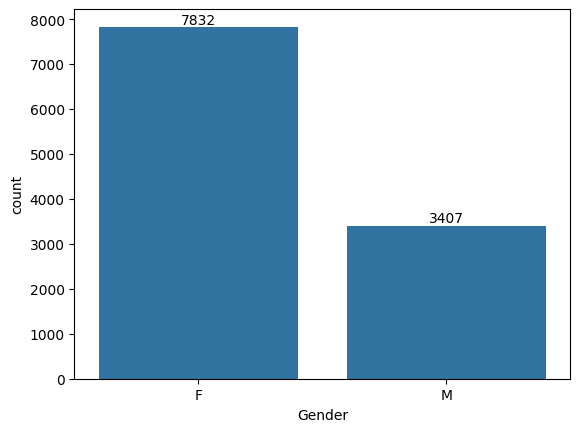

In [19]:
# plotting a bar chart for Gender and it's count
ax = sns.countplot(x='Gender' , data = df)

for bars in ax.containers:
    ax.bar_label(bars)
    

In [24]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

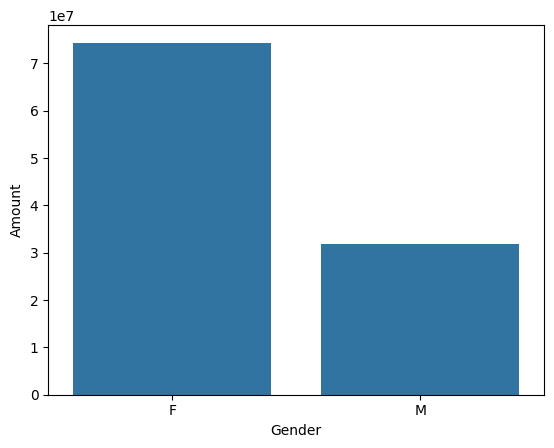

In [12]:
## plotting a bar chart for gender vs total amount

gdt= df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False)
sns.barplot(x = 'Gender' , y = 'Amount' , data = gdt)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

### Age

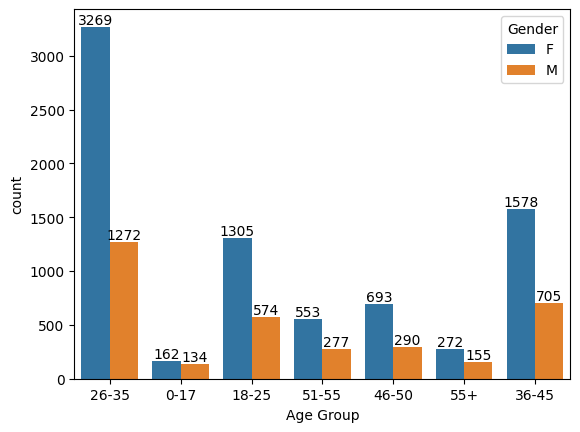

In [27]:
ax = sns.countplot(x='Age Group' , data = df , hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

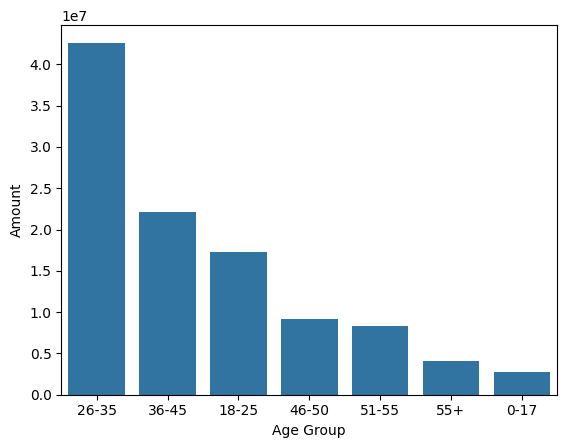

In [16]:
## Total Amount vs Age Group

agt = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False)
sns.barplot(x = 'Age Group' , y = 'Amount' , data = agt)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

### State

<Axes: xlabel='State', ylabel='Orders'>

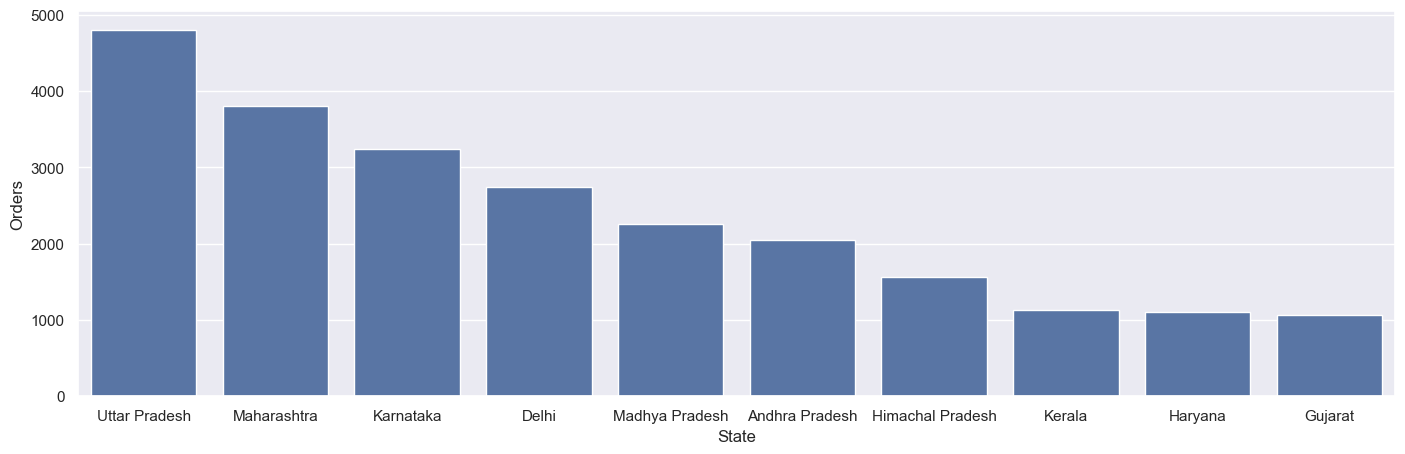

In [17]:
# total number of orders from top 10 states

stt = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by='Orders' , ascending = False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x = 'State' , y = 'Orders' , data = stt)

<Axes: xlabel='State', ylabel='Amount'>

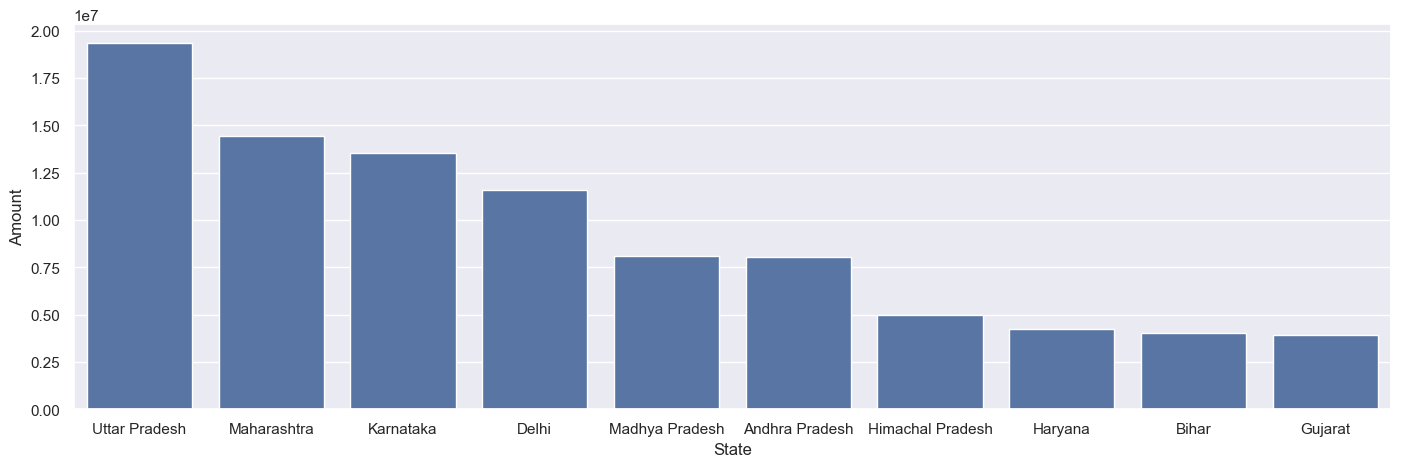

In [31]:
# total amount/sales from top 10 states

stt = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x = 'State' , y = 'Amount' , data = stt)

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

### Marital Status

<Axes: xlabel='Marital_Status', ylabel='Orders'>

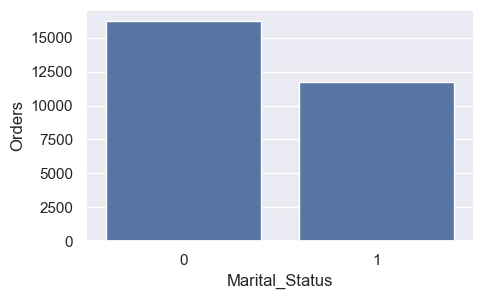

In [35]:
stt = df.groupby(['Marital_Status'], as_index = False)['Orders'].sum().sort_values(by='Orders' , ascending = False).head(10)
sns.set(rc={'figure.figsize':(5,3)})
sns.barplot(x = 'Marital_Status' , y = 'Orders' , data = stt)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

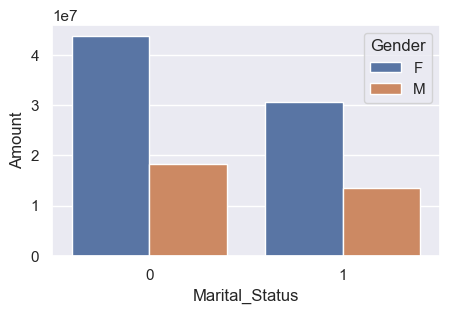

In [40]:
stt = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False).head(10)
sns.set(rc={'figure.figsize':(5,3)})
sns.barplot(x = 'Marital_Status' , y = 'Amount' , data = stt, hue = 'Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

### Occupation

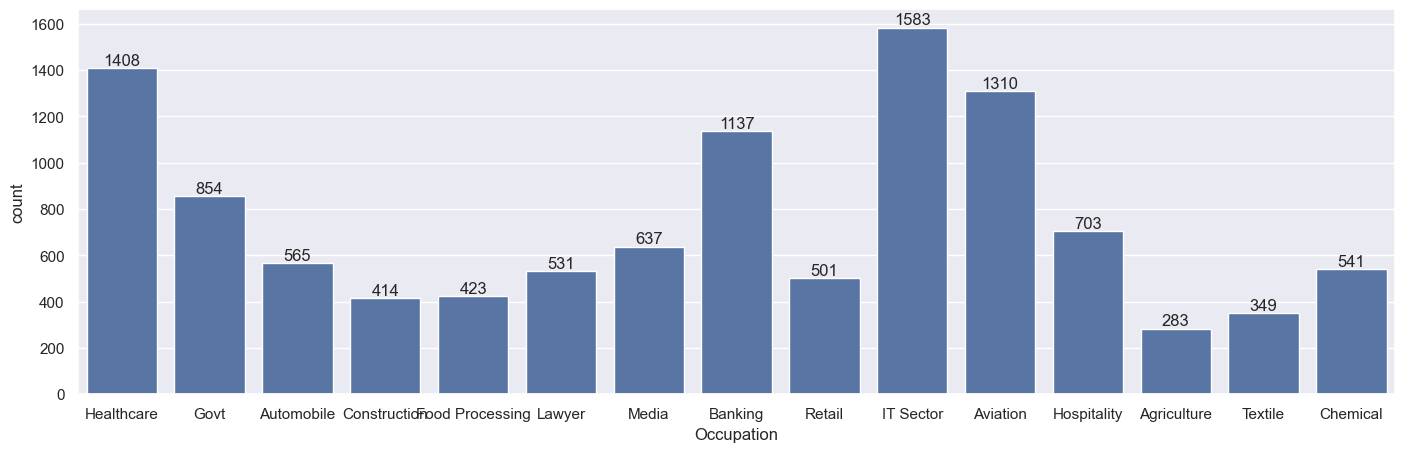

In [43]:
ax = sns.countplot(x='Occupation' , data = df)

for bars in ax.containers:
    ax.bar_label(bars)
    

<Axes: xlabel='Occupation', ylabel='Amount'>

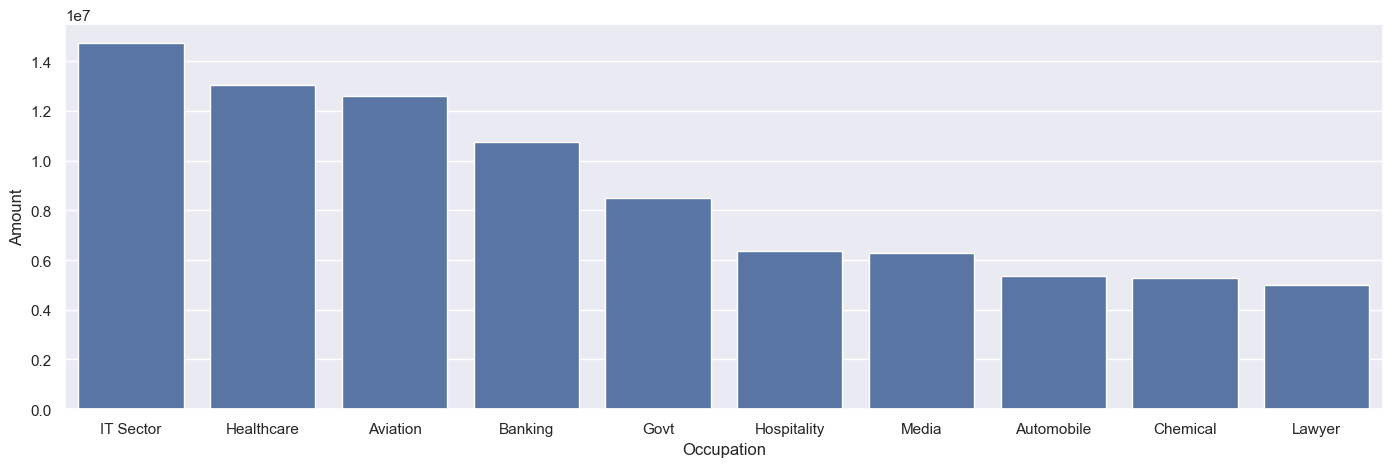

In [42]:
stt = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x = 'Occupation' , y = 'Amount' , data = stt)

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product Catogory

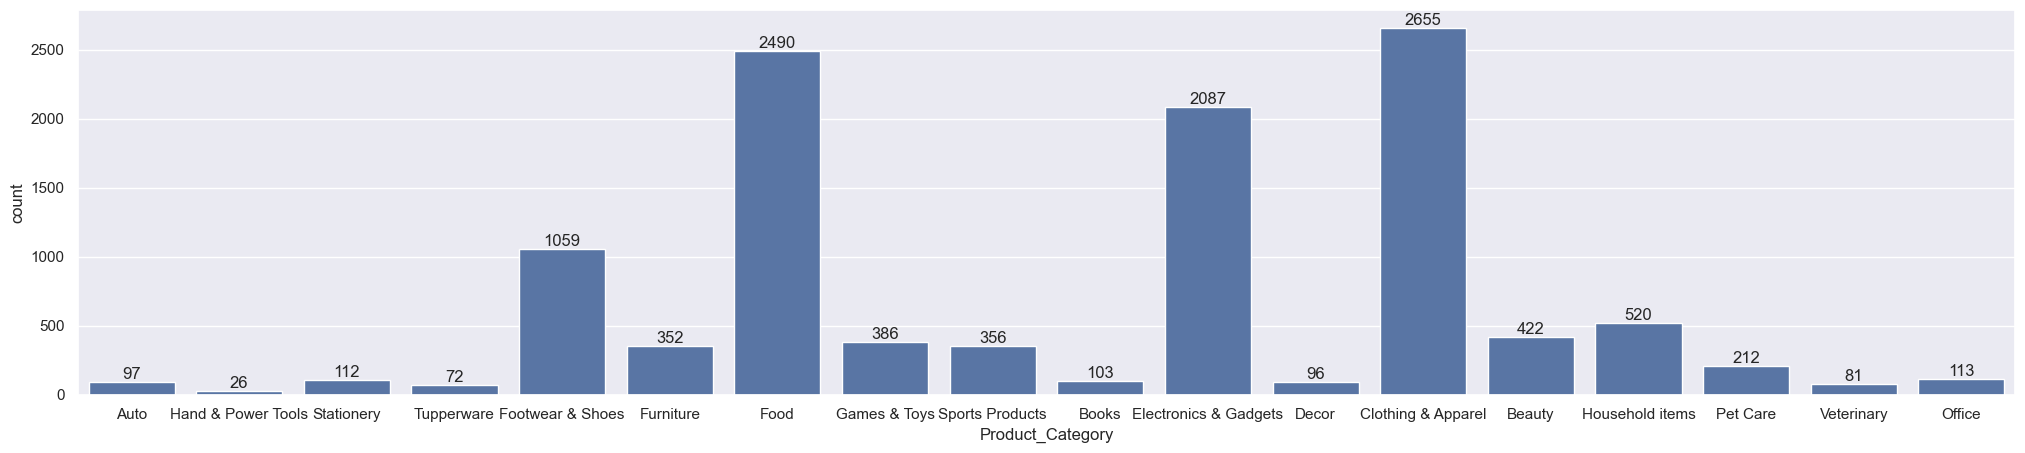

In [47]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(x='Product_Category' , data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

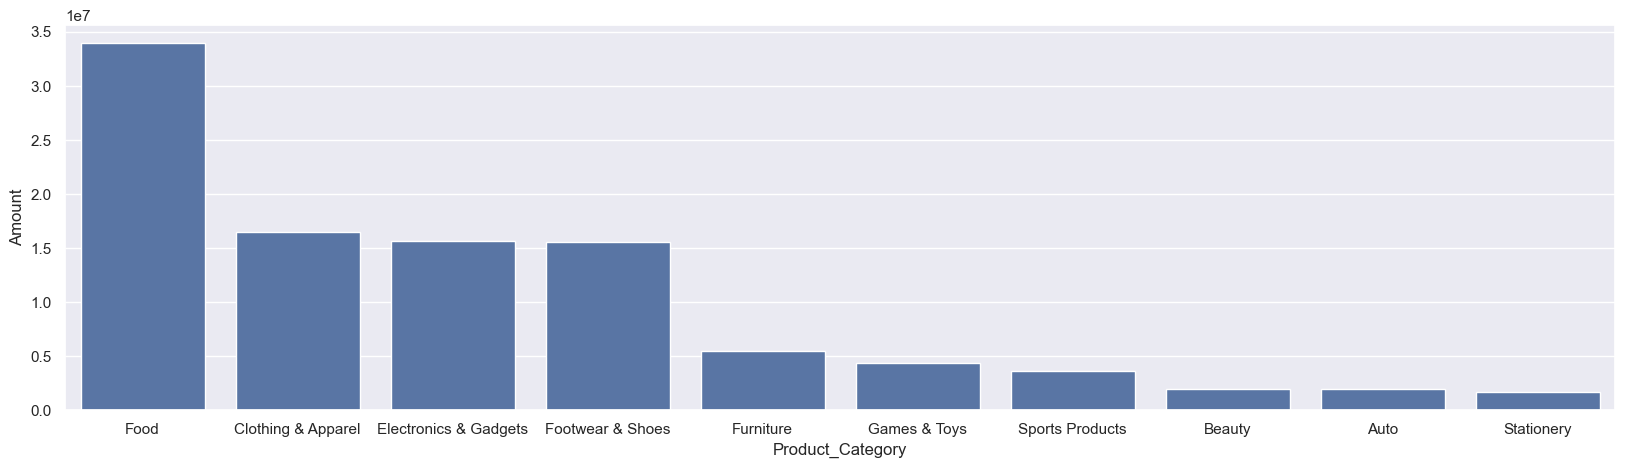

In [49]:
stt = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_Category' , y = 'Amount' , data = stt)

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

### Product ID

<Axes: xlabel='Product_ID', ylabel='Amount'>

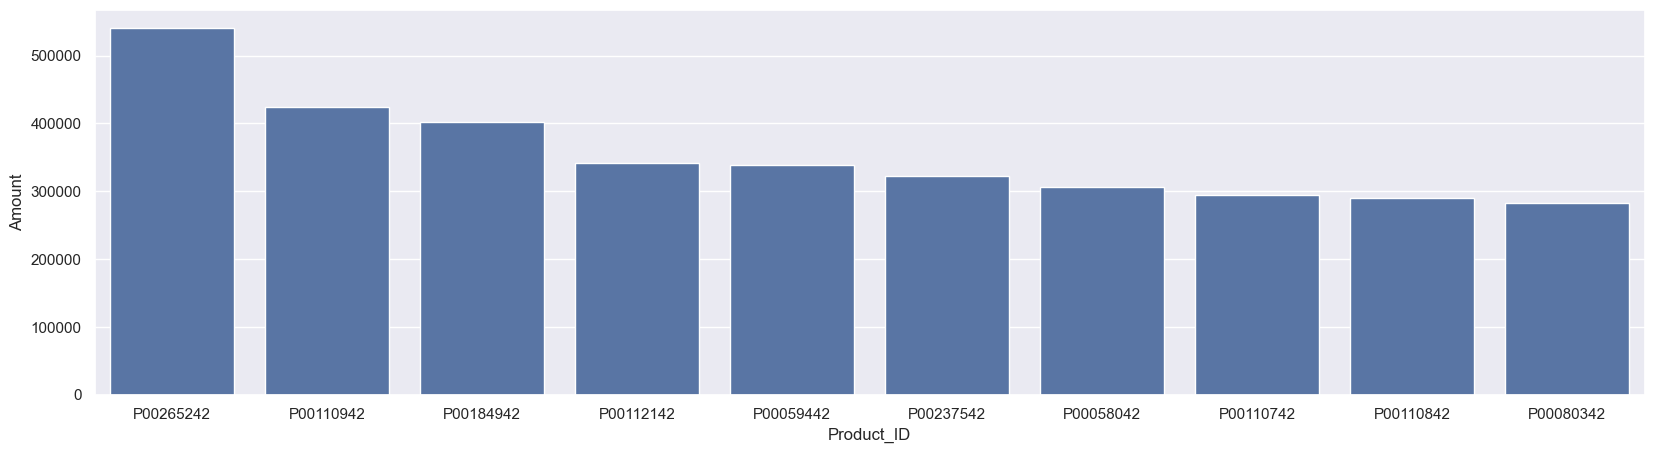

In [50]:
stt = df.groupby(['Product_ID'], as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_ID' , y = 'Amount' , data = stt)

## Conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category